<a href="https://colab.research.google.com/github/vijaikrish/Journal-Bearing-Design/blob/main/Bearing_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tkinter import *
import cmath
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import ttk
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import math
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot


In [3]:
LD0_25 = np.genfromtxt('drive/MyDrive/Bearing design/LDratio0_25.csv', delimiter=',')
LD0_5 = np.genfromtxt('drive/MyDrive/Bearing design/LDratio0_5.csv', delimiter=',')
LD1 = np.genfromtxt('drive/MyDrive/Bearing design/LDratio1.csv', delimiter=',')


In [4]:
eccentricity = 1
sommerfeld = 1
attitude_angle = 2
friction = 3
flow = 4
torque = 5


In [5]:
# This optimisation is performed for the fixed radius and the fixed axial value
# The clearance is the only value used for the optimisation
# Given data
# Bearing axial length = L
# Bearing shaft radius = R
# rotor weight = W
# Shaft speed = RPM
# Groove width = wg
# groove length = Lg


# If the center of gravity is at the center of the rotor 0.5 is used. So the weight of the rotor is equally balanced
CG_left = 0.5
rotor_weight = 1000       #Kg
CG_right = 1 - CG_left
bearing_load_left = rotor_weight * CG_left 
bearing_load_right = rotor_weight * CG_right
rpm = 5500               #RPM
shaft_diameter = 190     #mm

L = 42
D = shaft_diameter

LD_Ratio = L/D 

print(LD_Ratio)
# From the map check for the L/D ratio curve and enter the values of min friction and max load sommerfeld number

0.22105263157894736


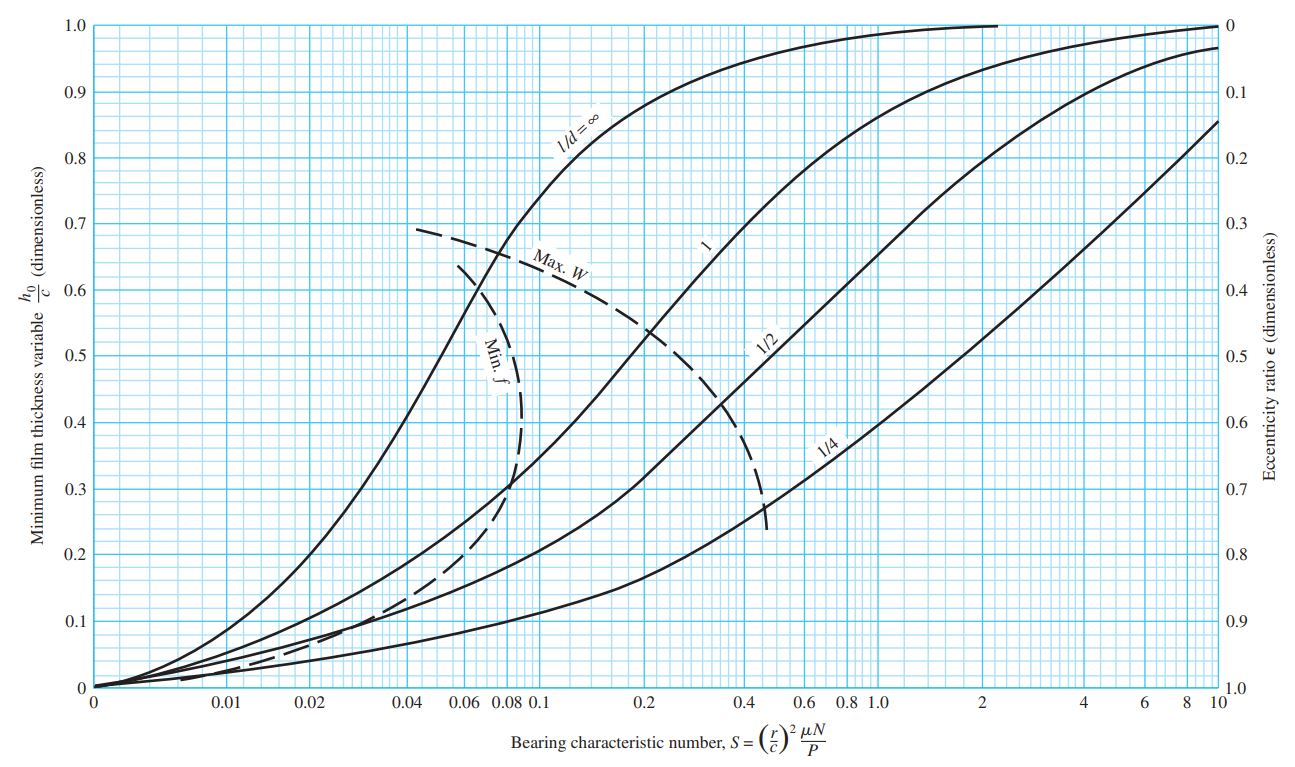

In [6]:
## Clearence range calculation

min_f_som = 
max_w_som = 

SyntaxError: ignored

In [7]:
#Lubricatant properties calculation

#Lubricant properties ISO VG 32

#Density at 15°C   873 kg/m³
#Kinematic viscosity at 40°C   32.02 mm²/s
#Kinematic viscosity at 100°C   5.4 mm²/s
#Specific gravity = 9.340398 * 10^6 kg/m³

#Lubricant properties ISO VG 46

#Density at 20°C	855.1 kg/m³
#Viscosity, kinematic at 40°C	   47.4  mm²/s
#Viscosity, kinematic at 100°C  	9.5  mm²/s
#specific gravity = 9.328874 * 10^6 kg/m³


lub = input ("Select the oil type: A) ISO VG 32  B) ISO VG 46(HSB). [A/B]? : ")
if lub == "A":
    density = 873
    ref_temp_density = 15
    kinematic_viscosity_40deg = 32.02 
    kinematic_viscosity_100deg = 5.3 
    specific_gravity = 0.873996294
    ref_temp_specific_gravity_f = 60
else:
    density = 855.1
    ref_temp_density = 20
    kinematic_viscosity_40deg = 46
    kinematic_viscosity_100deg = 6.5 
    specific_gravity = 0.872917952
    ref_temp_specific_gravity_f = 60

#print(density)
#print(ref_temp_density)
#print(kinematic_viscosity_40deg)
#print(kinematic_viscosity_100deg)
#print(specific_gravity)

Select the oil type: A) ISO VG 32  B) ISO VG 46(HSB). [A/B]? : B


In [ ]:
# Dynamic Viscosity calculation

def viscocity_calculation (specific_gravity, density, ref_temp_specific_gravity_f, kinematic_viscosity_40deg, kinematic_viscosity_100deg, calculation_temp):
  #Temperature coversion 
  calculation_temp_f = (calculation_temp * (9/5)) +32
  calculation_temp_f = (calculation_temp * (9/5)) +32
  calculation_temp_f = (calculation_temp * (9/5)) +32
  #Calculation of the specific gravity for the required temperature
  specific_gravity_temp = specific_gravity * (1 - (0.000421 * (calculation_temp_f - ref_temp_specific_gravity_f))) # lbf s2/in4

  #Calculation of desity for the required temperature 
  density_temp = specific_gravity_temp*8.3369/231*12**3   #lb/ft3

  #Calculation of kinematic viscocity for the required temperature 
  k1 = np.log(kinematic_viscosity_100deg/kinematic_viscosity_40deg)
  k2 = ((calculation_temp_f-104)/(212-104))
  kinematic_viscosity_temp = kinematic_viscosity_40deg * np.exp( k1 * k2) #cst or mm2/s
  # print (kinematic_viscosity_temp)

  #Calculation of the dynamic viscocity for the required temperature
  dynamic_viscosity = kinematic_viscosity_temp * density_temp*16.01846*10**-6 # pa s or Ns/m2

  return dynamic_viscosity, kinematic_viscosity_temp, density_temp

properties =[]
calculation_temp = []
#calculation_temp = 16
for i in range (0,30,1):
  if i == 0:
    calculation_temp.append(16)
  else:
    gen = calculation_temp[i-1] +5
    calculation_temp.append(gen)

  properties.append(viscocity_calculation(specific_gravity, density, ref_temp_specific_gravity_f, kinematic_viscosity_40deg, kinematic_viscosity_100deg, calculation_temp[i]))

type(properties)
print(properties)
print(calculation_temp)



In [9]:
#Converting list to array for the easy data processing with the array type 

prop_arr = np.array(properties)
dynamic_viscosity_arr = prop_arr[:,0]
kinematic_viscosity_arr = prop_arr[:,1]
density_arr = prop_arr[:,2]
#print(dynamic_viscosity_arr, kinematic_viscosity_arr, density_arr)

#Converting back to the list type for the calculation
#Python takes array as the string type, it gets difficult and confusing. It is always better to transfer them back to list to perform curve-fit calculation and other list based python library tools.

dynamic_viscosity_list = dynamic_viscosity_arr.tolist()
kinematic_viscosity_list = kinematic_viscosity_arr.tolist()
density_list = density_arr.tolist()
#print(dynamic_viscosity_list, kinematic_viscosity_list, density_list)


y = -0.00402 * x + 0.00005 * x^2 + -0.00000 * x^3 +0.00000 * x^4 + 0.14035


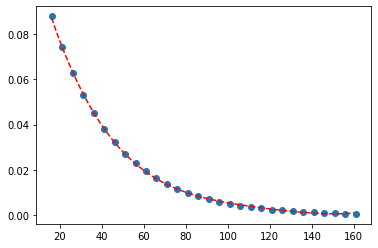

In [10]:
# Plotting dynamic viscocity with respect to the temperature
# using curve-fit algorithm
# define the true objective function
def objective(x, a, b, c, d,e):
	return a * x + b * x**2 + c * x**3 +d*x**4 +e
 
# choose the input and output variables
x, y = calculation_temp, dynamic_viscosity_list
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e = popt
print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 +%.5f * x^4 + %.5f' % (a, b, c, d,e))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d,e)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()



y = -4.50660 * x + 0.05205 * x^2 + -0.00028 * x^3 +0.00000 * x^4 + 159.74564


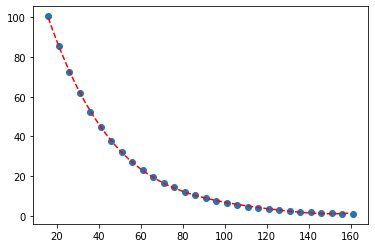

In [11]:
# Plotting kinematic viscocity with respect to the temperature
# using curve-fit algorithm
 
 
# choose the input and output variables
x, y = calculation_temp, kinematic_viscosity_list
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e = popt
print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 +%.5f * x^4 + %.5f' % (a, b, c, d,e))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d,e)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

y = -0.04125 * x + 0.00000 * x^2 + -0.00000 * x^3 +0.00000 * x^4 + 55.08068


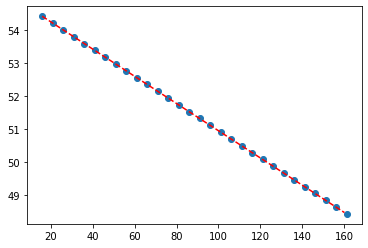

In [12]:
# Plotting desity with respect to the temperature
# using curve-fit algorithm
 
# choose the input and output variables
x, y = calculation_temp, density_list
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e = popt
print('y = %.5f * x + %.5f * x^2 + %.5f * x^3 +%.5f * x^4 + %.5f' % (a, b, c, d,e))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d,e)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [ ]:
## Friction force 












In [ ]:
## Minimum film thickness 














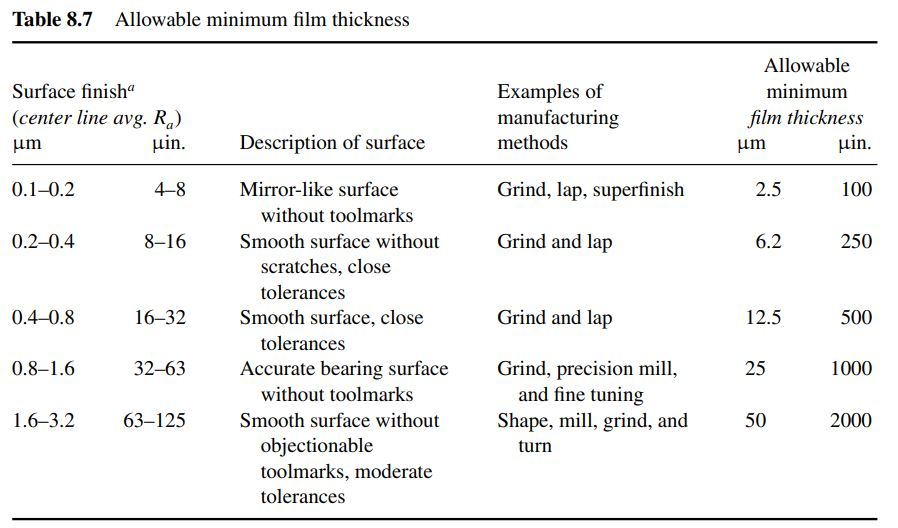

In [ ]:
## oil leakage calculation

c1 = 0.73 * (L/D)**(-0.035)
c2 = 0.73 * (L/D)**(0.66)
c3 = 0.444 * ((L/D)**0.35) * ((wg/D)**1.2) * (1+ (1.11*epi))

fl = (epi * f1 * f2)/f3 
f2 = 0.25 + (c1 * (1-epi)**c2)
f3 = 10**c3

fg = ((1.25 - (0.25*(lg/L))) / (3 * ((L/Lg)-1)**(1/3))) + (wg/D) / (3*(L/D)*(1-(Lg/L)))
(hg/D)**3 = (1 + (epi*np.cos(pi))**3) + (1 - (epi*np.sin(pi))**3)

# Oil Axial flow due to rotation
Lg/L = 0.3
m = 0.27 * (Ql / Qp)**0.27
Ql_total = Qm * (Lg / L)**m

# Pressure induced oil flow




# Total pressure



In [ ]:
## Power calculation 







In [ ]:
## Attitude angle calculation







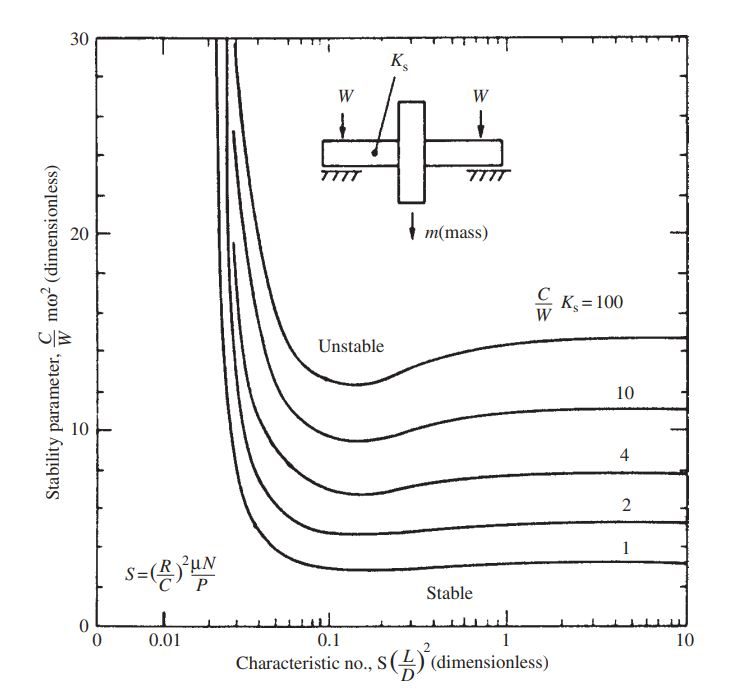

[[  83.     234.289  235.6    159.     107.608 1947.      60.323]
 [  88.5    259.426  232.5    145.6    108.632 1948.      61.122]
 [  88.2    258.054  368.2    161.6    109.773 1949.      60.171]
 [  89.5    284.599  335.1    165.     110.929 1950.      61.187]
 [  96.2    328.975  209.9    309.9    112.075 1951.      63.221]
 [  98.1    346.999  193.2    359.4    113.27  1952.      63.639]
 [  99.     365.385  187.     354.7    115.094 1953.      64.989]
 [ 100.     363.112  357.8    335.     116.219 1954.      63.761]
 [ 101.2    397.469  290.4    304.8    117.388 1955.      66.019]
 [ 104.6    419.18   282.2    285.7    118.734 1956.      67.857]
 [ 108.4    442.769  293.6    279.8    120.445 1957.      68.169]
 [ 110.8    444.546  468.1    263.7    121.95  1958.      66.513]
 [ 112.6    482.704  381.3    255.2    123.366 1959.      68.655]
 [ 114.2    502.601  393.1    251.4    125.368 1960.      69.564]
 [ 115.7    518.173  480.6    257.2    127.852 1961.      69.331]
 [ 116.9  

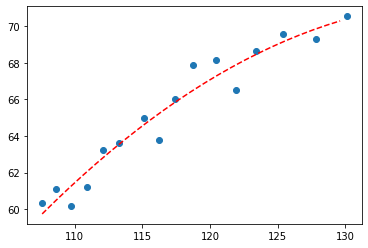

In [ ]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c
 
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
print(data)
# choose the input and output variables
x, y = data[:, 4], data[:, -1]
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()